### Dino attention map

In [6]:
%%bash

python dino/visualize_attention.py --image_path /home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/sample_images/bird.png --output_dir /home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output

Please use the `--pretrained_weights` argument to indicate the path of the checkpoint to evaluate.
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.
/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output/attn-head0.png saved.
/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output/attn-head1.png saved.
/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output/attn-head2.png saved.
/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output/attn-head3.png saved.
/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output/attn-head4.png saved.
/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dino/attention_output/attn-head5.png saved.


# Visualizing Attention Heads for a deer image


Below are the attention maps for each head. The images are displayed side by side for easy comparison.

<div style="display: flex; justify-content: space-around; flex-wrap: nowrap;">
<div style="margin: 10px; text-align: center;">
    <div><strong>attn-head0</strong></div>
    <img src="dino/attention_output/deer/img.png" style="max-width: 200px; height: auto;" alt="Attention Head 0">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head0</strong></div>
    <img src="dino/attention_output/deer/attn-head0.png" style="max-width: 200px; height: auto;" alt="Attention Head 0">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head1</strong></div>
    <img src="dino/attention_output/deer/attn-head1.png" style="max-width: 200px; height: auto;" alt="Attention Head 1">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head2</strong></div>
    <img src="dino/attention_output/deer/attn-head2.png" style="max-width: 200px; height: auto;" alt="Attention Head 2">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head3</strong></div>
    <img src="dino/attention_output/deer/attn-head3.png" style="max-width: 200px; height: auto;" alt="Attention Head 3">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head4</strong></div>
    <img src="dino/attention_output/deer/attn-head4.png" style="max-width: 200px; height: auto;" alt="Attention Head 4">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head5</strong></div>
    <img src="dino/attention_output/deer/attn-head5.png" style="max-width: 200px; height: auto;" alt="Attention Head 5">
  </div>
</div>


---

# Visualizing Attention Heads for a bird image


Below are the attention maps for each head. The images are displayed side by side for easy comparison.

<div style="display: flex; justify-content: space-around; flex-wrap: nowrap;">
<div style="margin: 10px; text-align: center;">
    <div><strong>attn-head0</strong></div>
    <img src="dino/attention_output/bird/img.png" style="max-width: 200px; height: auto;" alt="Attention Head 0">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head0</strong></div>
    <img src="dino/attention_output/bird/attn-head0.png" style="max-width: 200px; height: auto;" alt="Attention Head 0">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head1</strong></div>
    <img src="dino/attention_output/bird/attn-head1.png" style="max-width: 200px; height: auto;" alt="Attention Head 1">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head2</strong></div>
    <img src="dino/attention_output/bird/attn-head2.png" style="max-width: 200px; height: auto;" alt="Attention Head 2">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head3</strong></div>
    <img src="dino/attention_output/bird/attn-head3.png" style="max-width: 200px; height: auto;" alt="Attention Head 3">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head4</strong></div>
    <img src="dino/attention_output/bird/attn-head4.png" style="max-width: 200px; height: auto;" alt="Attention Head 4">
  </div>
  <div style="margin: 10px; text-align: center;">
    <div><strong>attn-head5</strong></div>
    <img src="dino/attention_output/bird/attn-head5.png" style="max-width: 200px; height: auto;" alt="Attention Head 5">
  </div>
</div>


### ViT CIFAR-10 Attention maps

In [3]:
import torch
import torchvision.transforms as T

import yaml
from vit_model import VisionTransformer

from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import numpy as np

import wandb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import os
import yaml

In [4]:
with open("vit_config.yaml", "r") as file:
    config = yaml.safe_load(file)

# Assign the config values to the corresponding variables
d_model   = config["d_model"]
n_classes = config["n_classes"]
img_size  = config["img_size"]
patch_size = config["patch_size"]
n_channels = config["n_channels"]
n_heads   = config["n_heads"]
n_layers  = config["n_layers"]
batch_size = config["batch_size"]
epochs    = config["epochs"]
alpha     = config["alpha"]
pos_type = config["pos_type"]

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
model = VisionTransformer(d_model, n_classes, img_size, patch_size, n_channels, n_heads, n_layers, pos_type=pos_type).to(device)



In [6]:
transform = T.Compose([
  # T.Resize(img_size),
  T.ToTensor()
])

test_set = CIFAR10(
  root="/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/dataset", train=False, download=True, transform=transform
)

test_loader = DataLoader(test_set, shuffle=False, batch_size=batch_size)

Files already downloaded and verified


In [ ]:
import os

def visualize_attention(model, image, image_idx, save_dir='attention_maps', n_heads=3, n_layers= 2):
    # Create directory for saving attention maps
    os.makedirs(save_dir, exist_ok=True)

    # Set model to evaluation mode
    model.train(False)

    # Forward pass to get attention weights
    _ = model(image)

    # Get number of patches in each dimension
    n_patches_h = img_size[0] // patch_size[0]
    n_patches_w = img_size[1] // patch_size[1]

    # Original image for reference
    img = image.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = (img * 0.5 + 0.5).clip(0, 1)  # Denormalize

    # Visualize attention from the last layer
    last_layer = model.transformer_encoder[-1]
    attn_weights = last_layer.mha.attn_weights.cpu().numpy()[0]  # [n_heads, seq_len, seq_len]

    # Plot attention from [CLS] token to patch tokens for each head in the last layer
    fig, axes = plt.subplots(1, n_heads, figsize=(15, 5))
    axes = axes.flatten()

    for h in range(n_heads):
        # Get attention weights from [CLS] token (index 0) to all patch tokens
        cls_attn = attn_weights[h, 0, 1:]  # Skip the [CLS] token itself

        # Reshape to match the image patches
        attn_map = cls_attn.reshape(n_patches_h, n_patches_w)
        # Plot
        axes[h].imshow(img)
        im = axes[h].imshow(attn_map, alpha=0.5, cmap='hot')
        axes[h].set_title(f'Head {h+1}')
        axes[h].axis('off')

    # Save the figure with all heads
    fig.suptitle(f'Attention Maps from [CLS] Token (Last Layer) - Image {image_idx}')
    fig.tight_layout()
    fig.savefig(f'{save_dir}/all_heads_last_layer_img{image_idx}.png')

    # Average attention across all heads
    avg_attn = attn_weights.mean(axis=0)[0, 1:]
    avg_attn_map = avg_attn.reshape(n_patches_h, n_patches_w)

    # Plot average attention
    fig_avg = plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.imshow(avg_attn_map, alpha=0.5, cmap='hot')
    plt.title('Average Attention (Last Layer)')
    plt.axis('off')
    plt.savefig(f'{save_dir}/avg_attention_last_layer_img{image_idx}.png')
    plt.close(fig_avg)

    # Visualize attention across all layers
    fig_layers = plt.figure(figsize=(15, 5))

    for l, encoder in enumerate(model.transformer_encoder):
        attn_weights = encoder.mha.attn_weights.cpu().numpy()[0]

        # Average attention across all heads for this layer
        avg_attn = attn_weights.mean(axis=0)[0, 1:]
        avg_attn_map = avg_attn.reshape(n_patches_h, n_patches_w)

        # Plot
        plt.subplot(1, n_layers, l+1)
        plt.imshow(img)
        plt.imshow(avg_attn_map, alpha=0.5, cmap='hot')
        plt.title(f'Layer {l+1}')
        plt.axis('off')

    plt.suptitle(f'Attention Maps Across Layers - Image {image_idx}')
    plt.tight_layout()
    plt.savefig(f'{save_dir}/attention_across_layers_img{image_idx}.png')
    plt.close(fig_layers)

    # Close the first figure
    plt.close(fig)

    # Print statistics about the attention maps for verification
    print(f"\nAttention statistics for image {image_idx}:")
    print(f"Last layer attention shape: {attn_weights.shape}")

    # Print min, max, mean values for each head in the last layer
    for h in range(n_heads):
        head_attn = attn_weights[h, 0, 1:]
        print(f"Head {h+1}: min={head_attn.min():.4f}, max={head_attn.max():.4f}, mean={head_attn.mean():.4f}")

    # Print average attention statistics
    print(f"Average attention: min={avg_attn.min():.4f}, max={avg_attn.max():.4f}, mean={avg_attn.mean():.4f}")

    print(f"Attention maps for image {image_idx} saved to {save_dir}/")

    # List the saved files
    saved_files = [
        f'{save_dir}/all_heads_last_layer_img{image_idx}.png',
        f'{save_dir}/avg_attention_last_layer_img{image_idx}.png',
        f'{save_dir}/attention_across_layers_img{image_idx}.png'
    ]

    print("Saved files:")
    for file in saved_files:
        if os.path.exists(file):
            print(f"- {file} ({os.path.getsize(file) / 1024:.1f} KB)")
        else:
            print(f"- {file} (File not created)")


    return saved_files



if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VisionTransformer(d_model, n_classes, img_size, patch_size, n_channels, n_heads, n_layers, pos_type=pos_type).to(device)
    state_dict = torch.load("/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/vit-patchsize-8-attention_head-10-layer-10-augmentation-basic-pos_type-sinusoidal/best.pt", map_location=device)
    model.load_state_dict(state_dict)
    for i, data in enumerate(test_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            break
    visualize_attention(model,inputs[0].unsqueeze(0), 1, n_layers = n_layers, n_heads = n_heads)

/tmp/ipykernel_3466718/2343868849.py:120: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/


Attention statistics for image 1:
Last layer attention shape: (10, 17, 17)
Head 1: min=0.0132, max=0.1437, mean=0.0615
Head 2: min=0.0058, max=0.1304, mean=0.0621
Head 3: min=0.0028, max=0.3955, mean=0.0623
Head 4: min=0.0006, max=0.4306, mean=0.0593
Head 5: min=0.0024, max=0.2602, mean=0.0581
Head 6: min=0.0018, max=0.1871, mean=0.0491
Head 7: min=0.0001, max=0.2377, mean=0.0623
Head 8: min=0.0496, max=0.0727, mean=0.0603
Head 9: min=0.0150, max=0.2051, mean=0.0526
Head 10: min=0.0078, max=0.1178, mean=0.0605
Average attention: min=0.0342, max=0.0963, mean=0.0588
Attention maps for image 1 saved to attention_maps/
Saved files:
- attention_maps/all_heads_last_layer_img1.png (17.7 KB)
- attention_maps/avg_attention_last_layer_img1.png (9.9 KB)
- attention_maps/attention_across_layers_img1.png (16.1 KB)


In [7]:
#Combining all the above code

import os
import torch
import matplotlib.pyplot as plt


def visualize_attention_combined(model, image, image_idx,
                                 save_path='attention_combined.png',
                                 n_heads=3, n_layers=2,
                                 img_size=(224, 224), patch_size=(16, 16)):
    # Ensure model in eval mode
    model.eval()

    # Forward pass to populate attention
    _ = model(image)

    # Number of patches in each dim
    n_patches_h = img_size[0] // patch_size[0]
    n_patches_w = img_size[1] // patch_size[1]

    # Denormalize and prepare image
    img = image.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = (img * 0.5 + 0.5).clip(0, 1)

    # Collect attention weights per layer
    all_layer_attns = []
    for encoder in model.transformer_encoder:
        w = encoder.mha.attn_weights.cpu().detach().numpy()[0]  # [heads, seq_len, seq_len]
        all_layer_attns.append(w)

    # Last-layer weights
    last_attn = all_layer_attns[-1]

    # Create big figure with GridSpec and spacing to avoid overlap
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, n_heads, wspace=0.3, hspace=0.4)

    # 1) Row 0: Last-layer, individual heads
    for h in range(n_heads):
        ax = fig.add_subplot(gs[0, h])
        cls_attn = last_attn[h, 0, 1:]
        attn_map = cls_attn.reshape(n_patches_h, n_patches_w)
        ax.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
        im = ax.imshow(attn_map, alpha=0.8, cmap='hot', vmin=0, vmax=1, extent=(0, n_patches_w, n_patches_h, 0))
        ax.axis('off')
        ax.set_title(f'Head {h+1}')
        # Add colorbar in range 0-1
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=[0, 0.5, 1])

    # 2) Row 1: Average attention (last layer)
    ax_avg = fig.add_subplot(gs[1, :])
    avg_last = last_attn.mean(axis=0)[0, 1:].reshape(n_patches_h, n_patches_w)
    ax_avg.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
    im_avg = ax_avg.imshow(avg_last, alpha=0.8, cmap='hot', vmin=0, vmax=1, extent=(0, n_patches_w, n_patches_h, 0))
    ax_avg.axis('off')
    ax_avg.set_title('Average Attention (Last Layer)')
    fig.colorbar(im_avg, ax=ax_avg, orientation='horizontal', fraction=0.05, pad=0.1, ticks=[0, 0.5, 1])

    # 3) Row 2: Across layers, averaged heads per layer
    for l in range(n_layers):
        ax = fig.add_subplot(gs[2, l])
        avg_layer = all_layer_attns[l].mean(axis=0)[0, 1:].reshape(n_patches_h, n_patches_w)
        ax.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
        im_layer = ax.imshow(avg_layer, alpha=0.8, cmap='hot', vmin=0, vmax=1, extent=(0, n_patches_w, n_patches_h, 0))
        ax.axis('off')
        ax.set_title(f'Layer {l+1}')
        fig.colorbar(im_layer, ax=ax, fraction=0.046, pad=0.04, ticks=[0, 0.5, 1])

    # 4) Original image inset moved above first row to avoid overlap
    inset_ax = fig.add_axes([0.88, 0.88, 0.1, 0.1])  # [left, bottom, width, height]
    inset_ax.imshow(img)
    inset_ax.axis('off')
    inset_ax.set_title('Original Image', fontsize=10)

    # Overall title and save
    fig.suptitle(f'Combined Attention Visualization - Image {image_idx}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(save_path)
    plt.close(fig)

    print(f"Saved combined attention figure to {save_path}")
    return save_path


# Example usage
if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = VisionTransformer(d_model, n_classes, img_size, patch_size,
                              n_channels, n_heads, n_layers,
                              pos_type=pos_type).to(device)
    ckpt = torch.load('/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/vit-patchsize-8-attention_head-10-layer-10-augmentation-basic-pos_type-sinusoidal/best.pt', map_location=device)
    model.load_state_dict(ckpt)
    
    # grab a batch
    inputs, _ = next(iter(test_loader))
    inputs = inputs.to(device)
    visualize_attention_combined(model, inputs[0].unsqueeze(0),
                                 image_idx=1,
                                 save_path='attention_maps/attention_combined_img1.png',
                                 n_heads=n_heads,
                                 n_layers=n_layers,
                                 img_size=img_size,
                                 patch_size=patch_size)

/tmp/ipykernel_3559071/1351731123.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/vit-pat

Saved combined attention figure to attention_maps/attention_combined_img1.png


#### Attention rollout

In [25]:
def attention_rollout(attention_maps, discard_ratio=0.1):
    """
    Compute attention rollout as described in the ViT paper and
    'Quantifying Attention Flow in Transformers'
    
    Args:
        attention_maps: List of attention maps from each layer [num_layers, batch, heads, seq_len, seq_len]
        discard_ratio: The ratio of lowest attentions to discard
        
    Returns:
        rollout: The aggregated attention map [batch, seq_len, seq_len]
    """
    # Average the attention weights across heads
    
    attention_maps = [attn.mean(dim=1) for attn in attention_maps]  # [num_layers, batch, seq_len, seq_len]
    
    # Apply discard ratio: zero out the lowest values
    
    for i in range(len(attention_maps)):
        flat = attention_maps[i].reshape(attention_maps[i].size(0), -1)
        _, indices = flat.sort(dim=-1)
        flat_indices = indices[:, :int(flat.size(-1) * discard_ratio)]
        
        # Create a mask with zeros at the discarded positions
        
        batch_size, seq_len = attention_maps[i].size(0), attention_maps[i].size(1)
        mask = torch.ones(batch_size, seq_len, seq_len, device=attention_maps[i].device)
        
        for j in range(batch_size):
            row_indices = flat_indices[j] // seq_len
            col_indices = flat_indices[j] % seq_len
            mask[j, row_indices, col_indices] = 0
            
        attention_maps[i] = attention_maps[i] * mask
        
        # Re-normalize the attention maps
        
        attention_maps[i] = attention_maps[i] / (attention_maps[i].sum(dim=-1, keepdim=True) + 1e-8)
    
    # Start with identity matrix
    
    batch_size, seq_len = attention_maps[0].size(0), attention_maps[0].size(1)
    rollout = torch.eye(seq_len).unsqueeze(0).repeat(batch_size, 1, 1).to(attention_maps[0].device)
    
    # Compute rollout through matrix multiplication
    
    for attn in attention_maps:
        rollout = torch.bmm(attn, rollout)
    
    return rollout

In [38]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

def visualize_attention_combined_attention_rollout(model, image, image_idx,
                                 save_path='attention_combined.png',
                                 n_heads=3, n_layers=2,
                                 img_size=(224, 224), patch_size=(16, 16)):
    # Ensure model in eval mode
    model.eval()

    # Forward pass to populate attention
    _ = model(image)

    # Number of patches in each dim
    n_patches_h = img_size[0] // patch_size[0]
    n_patches_w = img_size[1] // patch_size[1]

    # Denormalize and prepare image
    img = image.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = (img * 0.5 + 0.5).clip(0, 1)

    # Collect attention weights per layer
    all_layer_attns = []
    for encoder in model.transformer_encoder:
        w = encoder.mha.attn_weights.cpu().detach().numpy()[0]  # [heads, seq_len, seq_len]
        all_layer_attns.append(w)

    # Compute attention rollout
    seq_len = all_layer_attns[0].shape[1]
    rollout = np.eye(seq_len)
    for attn in all_layer_attns:
        avg_attn = attn.mean(axis=0)  # Average over heads
        avg_attn += np.eye(seq_len)   # Add identity for residual
        avg_attn /= avg_attn.sum(axis=-1, keepdims=True)  # Normalize
        rollout = np.dot(avg_attn, rollout)
    rollout_attention = rollout[0, 1:].reshape(n_patches_h, n_patches_w)

    # Last-layer weights
    last_attn = all_layer_attns[-1]

    # Create big figure with GridSpec and spacing
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(4, n_heads, wspace=0.3, hspace=0.4)

    # 1) Row 0: Last-layer, individual heads
    for h in range(n_heads):
        ax = fig.add_subplot(gs[0, h])
        cls_attn = last_attn[h, 0, 1:]
        attn_map = cls_attn.reshape(n_patches_h, n_patches_w)
        ax.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
        im = ax.imshow(attn_map, alpha=0.8, cmap='hot', vmin=0, vmax=1)
        ax.axis('off')
        ax.set_title(f'Head {h+1}')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # 2) Row 1: Average attention (last layer)
    ax_avg = fig.add_subplot(gs[1, :])
    avg_last = last_attn.mean(axis=0)[0, 1:].reshape(n_patches_h, n_patches_w)
    ax_avg.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
    im_avg = ax_avg.imshow(avg_last, alpha=0.8, cmap='hot', vmin=0, vmax=1)
    ax_avg.axis('off')
    ax_avg.set_title('Average Attention (Last Layer)')
    fig.colorbar(im_avg, ax=ax_avg, orientation='horizontal', fraction=0.05, pad=0.1)

    # 3) Row 2: Across layers, averaged heads per layer
    for l in range(n_layers):
        ax = fig.add_subplot(gs[2, l])
        avg_layer = all_layer_attns[l].mean(axis=0)[0, 1:].reshape(n_patches_h, n_patches_w)
        ax.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
        im_layer = ax.imshow(avg_layer, alpha=0.8, cmap='hot', vmin=0, vmax=1)
        ax.axis('off')
        ax.set_title(f'Layer {l+1}')
        fig.colorbar(im_layer, ax=ax, fraction=0.046, pad=0.04)

    # 4) Row 3: Attention Rollout
    ax_rollout = fig.add_subplot(gs[3, :])
    ax_rollout.imshow(img, extent=(0, n_patches_w, n_patches_h, 0))
    im_rollout = ax_rollout.imshow(rollout_attention, alpha=0.8, cmap='hot', vmin=0, vmax=1)
    ax_rollout.axis('off')
    ax_rollout.set_title('Attention Rollout')
    fig.colorbar(im_rollout, ax=ax_rollout, orientation='horizontal', fraction=0.05, pad=0.1)

    # Original image inset
    inset_ax = fig.add_axes([0.88, 0.88, 0.1, 0.1])
    inset_ax.imshow(img)
    inset_ax.axis('off')
    inset_ax.set_title('Original Image', fontsize=10)

    # Overall title and save
    fig.suptitle(f'Combined Attention Visualization - Image {image_idx}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(save_path)
    plt.close(fig)

    print(f"Saved combined attention figure to {save_path}")
    return save_path



In [40]:
inputs, _ = next(iter(test_loader))
inputs = inputs.to(device)

visualize_attention_combined_attention_rollout(model, inputs[0].unsqueeze(0),
                                 image_idx=1,
                                 save_path='attention_maps/attention_combined_img1_attention_roll_out.png',
                                 n_heads=n_heads,
                                 n_layers=n_layers,
                                 img_size=img_size,
                                 patch_size=patch_size)

/tmp/ipykernel_3559071/3273301139.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Saved combined attention figure to attention_maps/attention_combined_img1_attention_roll_out.png


'attention_maps/attention_combined_img1_attention_roll_out.png'

### POs embedding

In [49]:
import torch
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import math

def visualize_positional_similarity(vit_model):
    # Extract learned positional embeddings from 1D learned positional encoding
    pos_embed = vit_model.positional_encoding.pos_embed  # Shape: (1, seq_len, d_model)
    
    # Remove class token embedding (first position)
    patch_pos_embed = pos_embed[:, 1:]  # Shape: (1, num_patches, d_model)
    
    # Calculate similarity matrix
    similarity = torch.matmul(patch_pos_embed, patch_pos_embed.transpose(-1, -2))
    similarity = similarity.squeeze(0).detach().cpu().numpy()  # (num_patches, num_patches)
    
    # Get grid dimensions from model parameters
    h_patches = vit_model.img_size[0] // vit_model.patch_size[0]
    w_patches = vit_model.img_size[1] // vit_model.patch_size[1]
    num_patches = h_patches * w_patches
    
    # Create visualization
    plt.figure(figsize=(12, 10))
    im = plt.imshow(similarity, cmap='viridis')
    plt.colorbar(im, fraction=0.046, pad=0.04, label="Dot-product Similarity")
    plt.title("Learned 1D Positional Embedding Similarities")
    
    # Add grid lines showing patch organization
    for i in range(1, h_patches):
        line_pos = i * w_patches - 0.5
        plt.axvline(line_pos, color='white', linestyle='--', linewidth=0.8)
        plt.axhline(line_pos, color='white', linestyle='--', linewidth=0.8)
    
    # Annotations for interpretation
    plt.text(-5, -2, "Key:", fontsize=12)
    plt.text(-5, num_patches+1, 
             "• Bright = High similarity\n• Dark = Low similarity\n• Grid shows original image patch structure",
             fontsize=10)
    
    # Remove axis ticks for cleaner look
    plt.xticks([])
    plt.yticks([])
    plt.show()







/tmp/ipykernel_3559071/3182138711.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/vit-patc

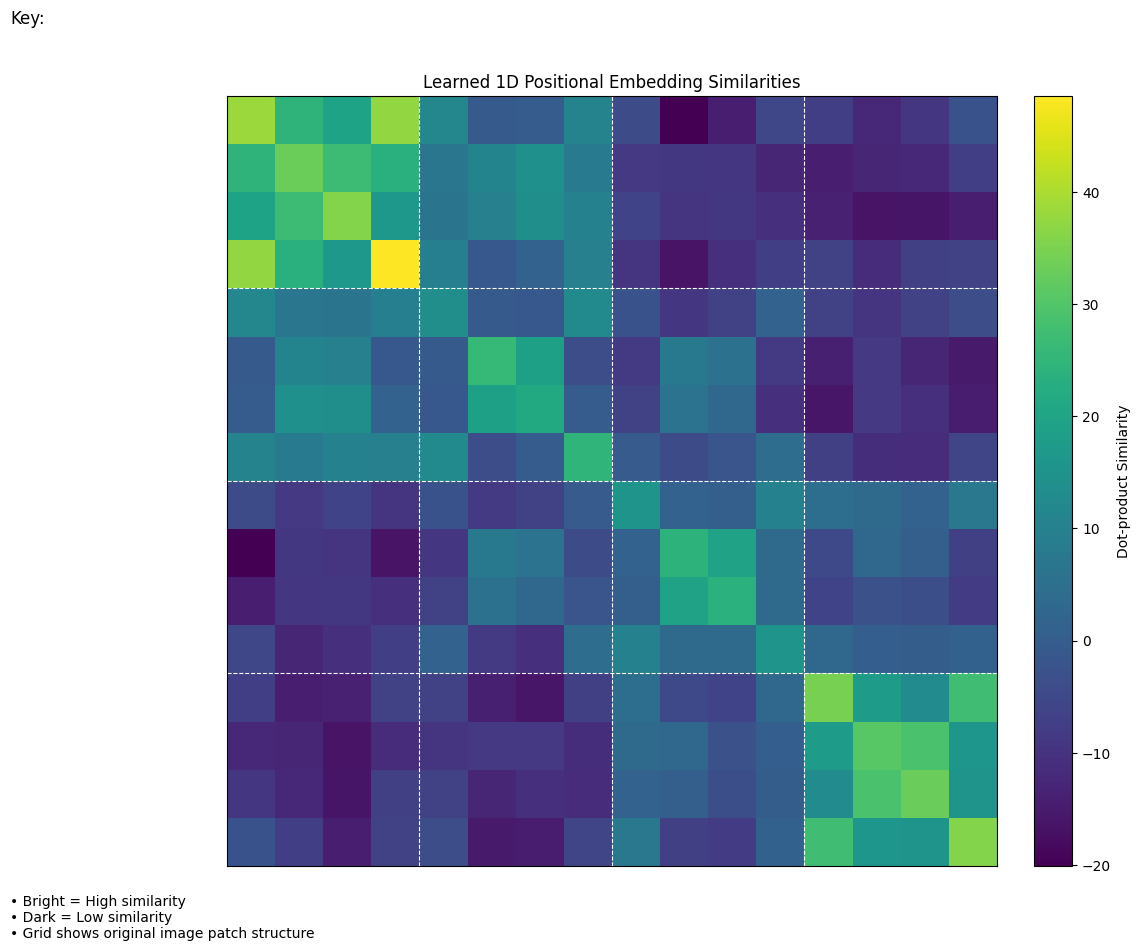

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VisionTransformer(d_model, n_classes, img_size, patch_size,
                            n_channels, n_heads, n_layers,
                            pos_type="1d_learned").to(device)
ckpt = torch.load('/home/akash/ws/cv_assignment/assignment-5-MlLearnerAkash/Q1/vit-patchsize-8-attention_head-10-layer-10-augmentation-basic-pos_type-1d_learned/best.pt', map_location=device)
model.load_state_dict(ckpt)

# Usage with your trained ViT model
visualize_positional_similarity(model)